# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
#env_info = env.reset(train_mode=True)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state
#score = 0                                          # initialize the score
#while True:
#    action = np.random.randint(action_size)        # select an action
#    env_info = env.step(action)[brain_name]        # send the action to the environment
#    next_state = env_info.vector_observations[0]   # get the next state
#    reward = env_info.rewards[0]                   # get the reward
#    done = env_info.local_done[0]                  # see if episode has finished
#    score += reward                                # update the score
#    state = next_state                             # roll over the state to next time step
#    if done:                                       # exit loop if episode finished
#        break
    
#print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

The Deep-Q-Network procedure **dqn** performs the double loop. External loop (by episodes) is executed till 
the number of episodes reached the maximal number n_episodes = 2000 or the completion criteria performed. 
The environment env is reset with the paarmeter train_mode=True. For the completion criteria, we check

     np.mean(scores_window) >=13,  
    
where scores_window is the array of the type deque realizing the shifting window of length <= 100. 
The element scores_window[i] contains the score achieved by the algorithm on the episode i.

In the internal loop, **dqn** gets the current action from the **agent**. By this _action_ **dqn** gets 
_state_ and _reward_ from the Unity environment _env_. Then, the agent accepts params state, action, reward ,next_state, done
to the next training step. The variable score accumulates obtained rewards.

In [5]:
import time
import math
import datetime
import torch                       
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline 

def dqn(n_episodes=2000, eps_start=.99, eps_end=0.01, eps_decay = .996, train_numb = 0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    start_time = time.time()                               # start time 
    scores = []                                            # list of scores for each episode
    scores_window = deque(maxlen=100)                      # last 100 scores
    eps = eps_start                                        # initialize epsilon

    for i_episode in range(1, n_episodes+1):               # loop by episodes
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]            # get the current state 
        score = 0                                          # reset the score counter
        done = False                                       # are we done yet?
        while not done:                                    # internal loop in the episode
            action = agent.act(state,eps)                  # next action from the agent 
            action = int(action)                           # cast to int
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # done is true if episode has finished
            agent.step(state,action,reward,next_state, done) # next learning step by state and reward
            score += reward                                # count our rewards
            state = next_state                             # update state
            if done:                                       # done ?
                break                                      # save score
        scores_window.append(score)                        # save score in the deque with 100 or less elements
        scores.append(score)
        
        eps = max(eps_end,eps_decay*eps)                   # make epsilon a bit smaller
        
        count = 0                                          # how many times we've reached 13
        for j in range(len(scores_window)):                
            if scores_window[j] >= 13:
                count+=1
                
        elapsed = datetime.timedelta(seconds = time.time()-start_time)  # elapsed time
        
        print('\rEpisode: {}, elapsed: {}, Avg.Score: {:.2f},  score {}, How many scores >= 13: {}, eps.: {:.2f}'. \
            format(i_episode, elapsed, np.mean(scores_window), score, count, eps), end="")
        
        if np.mean(scores_window) >=13:  # check completion criteria.
            print("\n terminating at episode :", i_episode, "ave reward reached +13 over 100 episodes")
            break
            
    torch.save(agent.qnetwork_local.state_dict(), 'weights_'+str(train_numb)+'.trn') # save the weights into the file 
    return scores, i_episode



### 5. Training sessions with different hyperparameters

We run the number of training sessions (in according to the parameter numb_of_trains) with different parameters 
fc1_units, fc2_units, eps_start. For each session, in the function **dqn**, we save obtained weights by the function 
_torch.save_ of the package **PyTorch**:

    torch.save(agent.qnetwork_local.state_dict(), 'weights_'+str(train_numb)+'.trn') 
    
For each training session, the obtained weights are saved into the file 'weights_'+str(train_numb)+'.trn'. We get files: weights_0.trn, weights_1.trn, weights_2.trn, etc.

fc1_units:  96 , fc2_units:  88
train_numb:  0 eps_start:  0.99
Episode: 585, elapsed: 0:09:51.835191, Avg.Score: 13.02,  score 16.0, How many scores >= 13: 58, eps.: 0.09
 terminating at episode : 585 ave reward reached +13 over 100 episodes


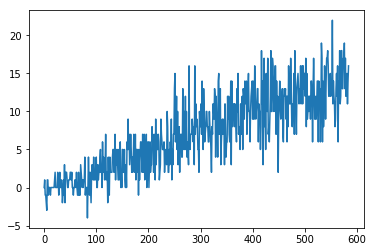


********************************************************

fc1_units:  48 , fc2_units:  32
train_numb:  1 eps_start:  0.992
Episode: 579, elapsed: 0:09:29.603803, Avg.Score: 13.00,  score 18.0, How many scores >= 13: 51, eps.: 0.10
 terminating at episode : 579 ave reward reached +13 over 100 episodes


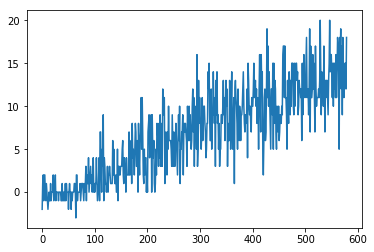


********************************************************

fc1_units:  80 , fc2_units:  88
train_numb:  2 eps_start:  0.992
Episode: 572, elapsed: 0:09:32.363203, Avg.Score: 13.00,  score 18.0, How many scores >= 13: 65, eps.: 0.10
 terminating at episode : 572 ave reward reached +13 over 100 episodes


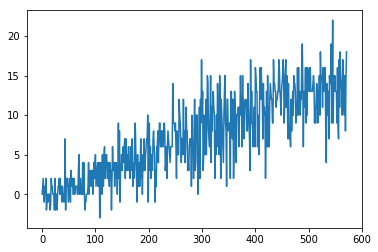


********************************************************

fc1_units:  64 , fc2_units:  56
train_numb:  3 eps_start:  0.994
Episode: 590, elapsed: 0:09:39.475603, Avg.Score: 13.02,  score 18.0, How many scores >= 13: 57, eps.: 0.09
 terminating at episode : 590 ave reward reached +13 over 100 episodes


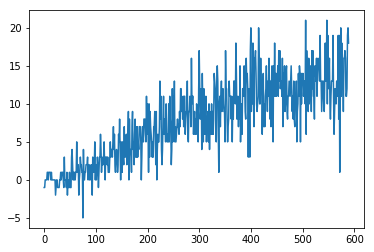


********************************************************

fc1_units:  80 , fc2_units:  88
train_numb:  4 eps_start:  0.989
Episode: 633, elapsed: 0:10:47.455223, Avg.Score: 13.06,  score 20.0, How many scores >= 13: 58, eps.: 0.08
 terminating at episode : 633 ave reward reached +13 over 100 episodes


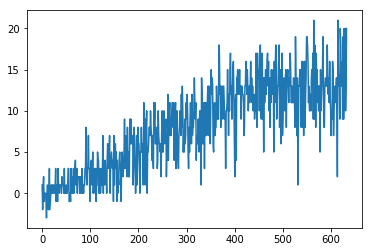


********************************************************



In [6]:
import random

list_fc1_units = []
list_fc2_units = []
list_eps_start = []
list_episodes  = []

numb_of_trains = 5 # 10 
for i in range(0, numb_of_trains):
    #generate random number of nodes
    fc1_nodes = random.randrange(48, 128, 16) # possible numbers : 48, 64, 80, 96, 112, 128 ( > 37)
    fc2_nodes = random.randrange(fc1_nodes - 16 , fc1_nodes + 16, 8)   # possible numbers  with step 8 

    #randomly initialize epsilon
    epsilon_start = random.randrange(988, 995, 1)/1000.
    
    print('fc1_units: ', fc1_nodes, ', fc2_units: ', fc2_nodes)
    print('train_numb: ', i, 'eps_start: ',epsilon_start)
    agent = Agent(state_size=37, action_size=4, seed=1, fc1_units=fc1_nodes, fc2_units=fc2_nodes)
    scores, episodes = dqn(n_episodes = 2000, eps_start = epsilon_start, train_numb=i)  # train with current params
    list_fc1_units.append(fc1_nodes)
    list_fc2_units.append(fc2_nodes)
    list_eps_start.append(epsilon_start)
    list_episodes.append(episodes)
    plt.plot(scores)
    plt.show()
    print("\n********************************************************\n")


### 6. Testing session and the average score

We load weights by the function _torch.save_ of the package **PyTorch** from one of the saved weights files:

    file_weights = 'weights_'+str(train_n)+'.trn'
    agent.qnetwork_local.load_state_dict(torch.load(file_weights))

We run testing for each file _weights_\__i.trn_, where i = 0,1,2,...
The testing procedure is implemented by the function **checkWeights**.
The function **checkWeights** constructs the **agent** with 
the parameters _fc1_\__units_ and _fc2_\__units_ corresponding to the given weights file.
For each testing session, we run **checkWeights** several times (=6 in this version) 
to get the average score for the given set of parameters.

For each session, the output will be looked as follows:

Train: 0, Test: 0, Episode: 569, fc1_units: 48, fc2_units: 40, eps_start: 0.992, Score: 19.0  
Train: 0, Test: 1, Episode: 569, fc1_units: 48, fc2_units: 40, eps_start: 0.992, Score: 17.0   
Train: 0, Test: 2, Episode: 569, fc1_units: 48, fc2_units: 40, eps_start: 0.992, Score: 16.0   
Train: 0, Test: 3, Episode: 569, fc1_units: 48, fc2_units: 40, eps_start: 0.992, Score: 15.0   
Train: 0, Test: 4, Episode: 569, fc1_units: 48, fc2_units: 40, eps_start: 0.992, Score: 20.0   
Train: 0, Test: 5, Episode: 569, fc1_units: 48, fc2_units: 40, eps_start: 0.992, Score: 18.0 

       Average Score:  17.5   

In [7]:
def checkWeights(env, train_n, test, fc1_n, fc2_n, eps_s, episodes):
    agent = Agent(state_size=37, action_size=4, seed=17, fc1_units=fc1_n, fc2_units=fc2_n)  
    file_weights = 'weights_'+str(train_n)+'.trn'
    agent.qnetwork_local.load_state_dict(torch.load(file_weights))

    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state,.05)                  # select an action
        action = int(action)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    
    print('Train: {}, Test: {}, Episode: {}, fc1_units: {}, fc2_units: {}, eps_start: {}, Score: {}'\
          .format(train_n, test, episodes, fc1_n, fc2_n, eps_s, score))
    return score

for i in range(0, numb_of_trains):
    fc1_nodes = list_fc1_units[i]
    fc2_nodes = list_fc2_units[i]
    eps_start = list_eps_start[i]
    episodes  = list_episodes[i]
    list_scores = []
    for test in range(0,6):        
        score = checkWeights(env=env, train_n=i, test=test, fc1_n=fc1_nodes, fc2_n=fc2_nodes, eps_s=eps_start,episodes=episodes)
        list_scores.append(score)
    avg_score =  np.mean(list_scores)
    print('       Average Score: ', avg_score)
    print('=========================================================')

Train: 0, Test: 0, Episode: 585, fc1_units: 96, fc2_units: 88, eps_start: 0.99, Score: 13.0
Train: 0, Test: 1, Episode: 585, fc1_units: 96, fc2_units: 88, eps_start: 0.99, Score: 16.0
Train: 0, Test: 2, Episode: 585, fc1_units: 96, fc2_units: 88, eps_start: 0.99, Score: 18.0
Train: 0, Test: 3, Episode: 585, fc1_units: 96, fc2_units: 88, eps_start: 0.99, Score: 14.0
Train: 0, Test: 4, Episode: 585, fc1_units: 96, fc2_units: 88, eps_start: 0.99, Score: 13.0
Train: 0, Test: 5, Episode: 585, fc1_units: 96, fc2_units: 88, eps_start: 0.99, Score: 17.0
       Average Score:  15.1666666667
Train: 1, Test: 0, Episode: 579, fc1_units: 48, fc2_units: 32, eps_start: 0.992, Score: 15.0
Train: 1, Test: 1, Episode: 579, fc1_units: 48, fc2_units: 32, eps_start: 0.992, Score: 9.0
Train: 1, Test: 2, Episode: 579, fc1_units: 48, fc2_units: 32, eps_start: 0.992, Score: 17.0
Train: 1, Test: 3, Episode: 579, fc1_units: 48, fc2_units: 32, eps_start: 0.992, Score: 17.0
Train: 1, Test: 4, Episode: 579, fc1_uni

In [8]:
env.close()